<a href="https://colab.research.google.com/github/chaiminwoo0223/Data-Analysis/blob/main/11%20-%20example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
mpg = pd.read_csv('/content/drive/MyDrive/수업/데이터 분석 입문/강의자료/Data/mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [2]:
# 기술 통계 분석
mpg.query('category in ["compact", "suv"]')\
   .groupby('category', as_index = False).agg(n = ('category', 'count'), mean = ('cty', 'mean'))

,category,n,mean
0,compact,47,20.12766
1,suv,62,13.50000


In [3]:
compact = mpg.query('category == "compact"')['cty']
suv = mpg.query('category == "suv"')['cty']

In [4]:
# t-test
from scipy import stats
stats.ttest_ind(compact, suv, equal_var = True)

Ttest_indResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21)

In [5]:
# 기술 통계 분석
mpg.query('fl in ["r", "p"]')\
   .groupby('fl', as_index = False).agg(n = ('fl', 'count'), mean = ('cty', 'mean'))

,fl,n,mean
0,p,52,17.365385
1,r,168,16.738095


In [6]:
regular = mpg.query('fl == "r"')['cty']
premium = mpg.query('fl == "p"')['cty']

In [7]:
# t-test
stats.ttest_ind(regular, premium, equal_var = True)

Ttest_indResult(statistic=-1.066182514588919, pvalue=0.28752051088667036)

In [8]:
# economics 데이터 불러오기
economics = pd.read_csv('/content/drive/MyDrive/수업/데이터 분석 입문/강의자료/Data/economics.csv')
# 상관행렬 만들기
economics[['unemploy', 'pce']].corr()

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


In [9]:
# 상관분석
stats.pearsonr(economics['unemploy'], economics['pce'])

(0.614517614193208, 6.773527303291701e-61)

In [10]:
mtcars = pd.read_csv('/content/drive/MyDrive/수업/데이터 분석 입문/강의자료/Data/mtcars.csv')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
car_cor = mtcars.corr()     # 상관행렬 만들기
car_cor = round(car_cor, 2) # 소수점 둘째자리까지 반올림
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '120', 'figure.figsize' : [7.5, 5.5]})

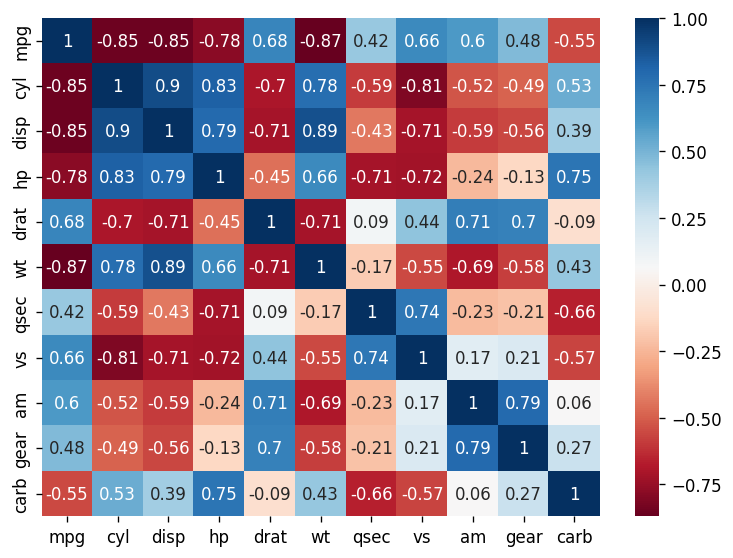

In [13]:
# 컬러맵 만들기
import seaborn as sns
sns.heatmap(car_cor, annot = True, cmap = 'RdBu')

In [14]:
# mask 만들기
import numpy as np
mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
# 오른쪽 위 대각행렬을 1로 바꾸기
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

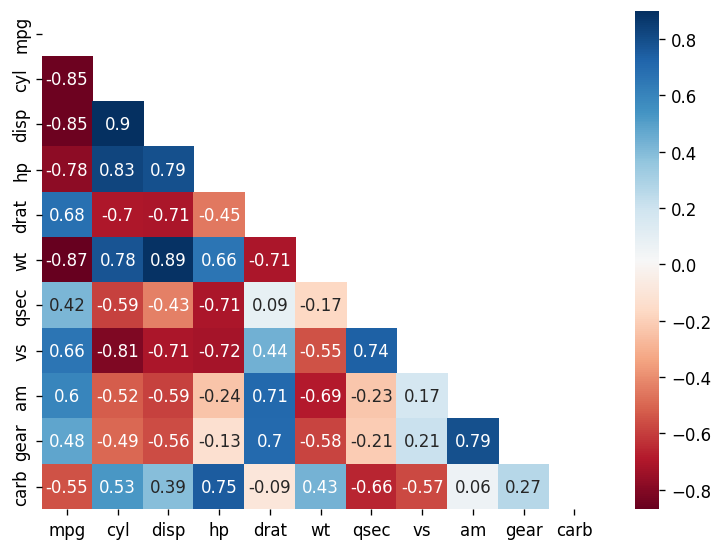

In [16]:
# 컬러맵 만들기
sns.heatmap(car_cor, annot = True, cmap = 'RdBu', mask = mask)

In [17]:
mask_new = mask[1: , :-1] # mask 첫번째 행, 마지막 열 제거하기
cor_new = car_cor.iloc[1: , :-1] # 상관행렬 첫번째 행, 마지막 열 제거하기

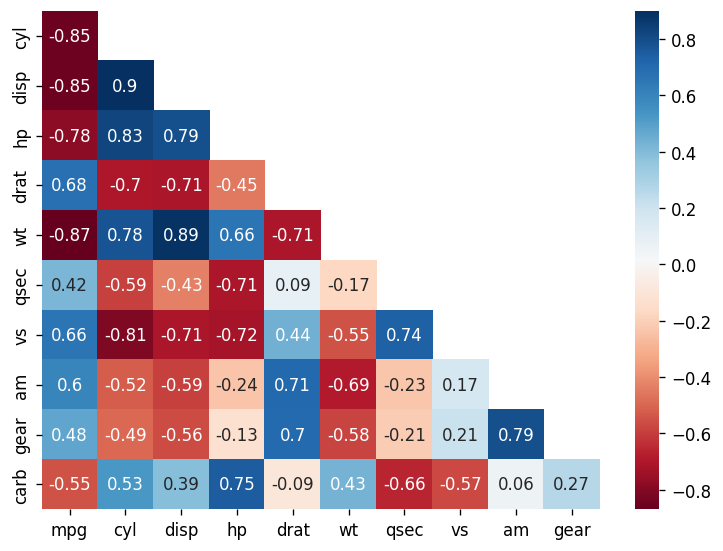

In [18]:
# 컬러맵 만들기
sns.heatmap(cor_new, annot = True, cmap = 'RdBu', mask = mask_new)

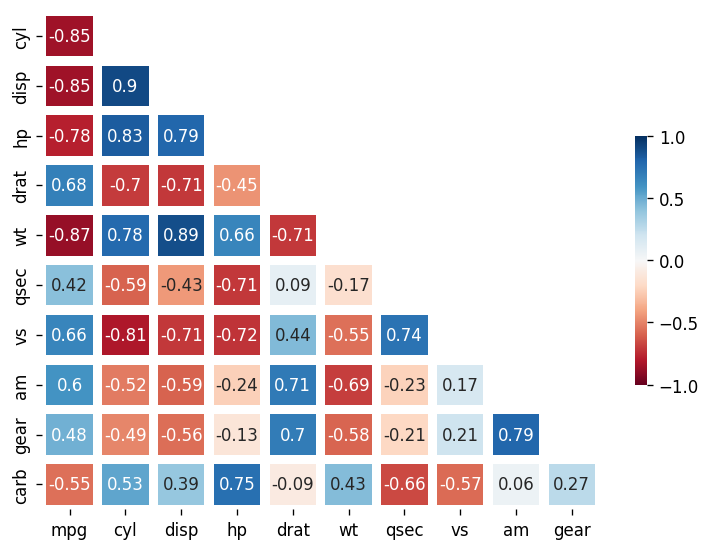

In [19]:
# 컬러맵 만들기
sns.heatmap(cor_new, annot = True, cmap = 'RdBu', mask = mask_new, linewidths = 5, vmax = 1, vmin = -1, cbar_kws = {"shrink": .5})